<a href="https://colab.research.google.com/github/Minhaz034/Student-s-percentage_prediction_with_LR/blob/main/Student's_percentage_prediction_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Author : Minhaz Bin Farukee

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


 Import data from given link

In [109]:
link = "http://bit.ly/w-data"
raw_data = pd.read_csv(link)

taking a look at the dataset

In [110]:
raw_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


checking for null values in dataset


In [111]:
raw_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

As there's only two variables: one independent and one dependent.We would try linear regression for prediction.Linear Regression only works if there exists any correlation between the dependent and independent variables.So now we will plot a scatterplot to manually find out the existance of correlation between the variables namely 'Hours' and 'Scores'

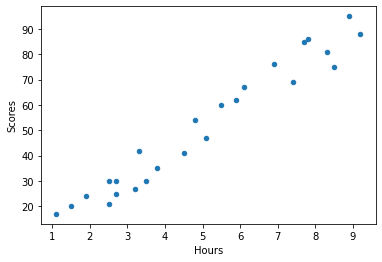

In [112]:
raw_data.plot(x='Hours',y='Scores',kind='scatter')
plt.show()

Trying out other plottings:


1.Line plot

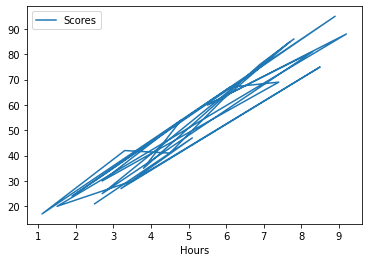

In [113]:
raw_data.plot(x='Hours',y='Scores',kind='line')
plt.show()

2.Bar plot:
Before Bar plotting ,I have sorted the dataframe raw_data on the variable 'Hours' to get a clear understandning of correlation

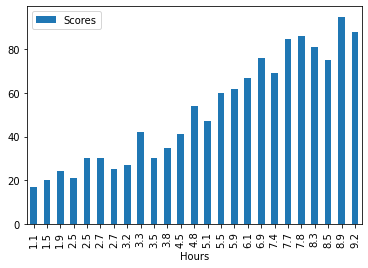

In [114]:
sorted_data = raw_data.sort_values('Hours')
sorted_data.plot(x='Hours',y='Scores',kind='bar')
plt.show()

New Section From the scatter,bar and line plot it is pretty clear that there's a positive correlation between 'Hours' ans 'Scores'.Now we can proceed and use Linear Regression on this data

Data preparation:

In [115]:
X = raw_data.iloc[:,:-1].values
y= raw_data.iloc[:,1].values

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=3)

 **Training Linear Regressiont**

In [117]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)

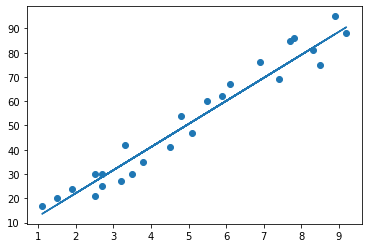

In [118]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**Independent predictions**

In [119]:
y_pred = reg.predict(X_test)


In [120]:
result = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

In [121]:
result

,Actual,Predicted
0,67,61.072402
1,24,21.181131
2,41,45.875727
3,76,68.670739
4,95,87.666582


Prediction for a given input:


In [122]:
hours = [[9.25]]

own_pred = reg.predict(hours)
print(own_pred)

[90.990855]


In [123]:
own_pred

array([90.990855])

In [124]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.656974488548368
